In [3]:
import mutual_info

In [67]:
import numpy as np
import matplotlib.pyplot as plt

In [143]:
def MLE_mutual_inf(sigma, theta_0):
    theta_h = []

    for cur in theta_0:
        theta_h.append(np.random.normal(loc = cur, scale = sigma, size = 1))

    theta_h = np.array(theta_h)
    theta_0 = np.expand_dims(np.array(theta_0), axis = 1)
    
    # mutual information: amount of information obtained about one random variable through the observation of the other
    return mutual_info.mutual_information((theta_0, theta_h), k = 10)

In [154]:
fisherinf = np.logspace(1, 2, 100)

In [155]:
theta_0_normal = np.random.normal(loc = 0, scale = 1, size = 10000)
mutinf_normal = [MLE_mutual_inf(1 / np.sqrt(cur_fisherinf), theta_0_normal) for cur_fisherinf in fisherinf]    

In [157]:
theta_0_uniform = np.random.uniform(low = -2, high = 2, size = 10000)
mutinf_uniform = [MLE_mutual_inf(1 / np.sqrt(cur_fisherinf), theta_0_uniform) for cur_fisherinf in fisherinf]  

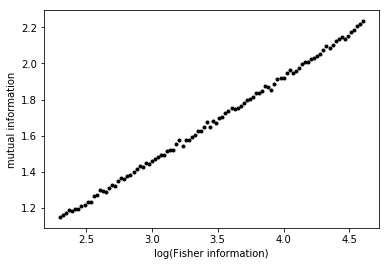

In [159]:
plt.scatter(np.log(fisherinf), mutinf_uniform, color = "black", marker = '.')
plt.xlabel("log(Fisher information)")
plt.ylabel("mutual information")
plt.show()

In [160]:
plt.scatter(np.log(fisherinf), mutinf_normal, color = "black", marker = '.')
plt.xlabel("log(Fisher information)")
plt.ylabel("mutual information")
plt.savefig("log.png")
#plt.show()